# Restaurant Recommendation
The main purpose of this notebook is to recommend 2-3 restaurants which are very similar to the restaurant which we choose as a paramater.
# Data
Here is the link to the data: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants The raw data is entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..
# Features
Features included in the raw dataset are: 'url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes','phone', 'location', 'rest_type', 'dish_liked', 'cuisines','approx_cost(for two people)'
However, for developing a recommendation system, we have droped certain features and used feauture engineering to develop certain new features.
# Data Pre-Processing

# What is happening at the backend?

# Other applications of Recommendation systems
Youtube is a good example where you can realise the recommendation system. Suppose you are a watched 'Tourism' video and it shows videos of "How to make a cake" in the recommended videos, does it make any sense? Will you click on it? Chances are less. The recommendation systems play a very big role in generating revenue for business by suggesting products or services which a customer is more likely to purchase, based on the analysis of the products and services which he has already chosen.

# Importing the data, pandas and numpy modules

In [189]:
import numpy as np
import pandas as pd
dataframe= pd.read_csv("zomato.csv")
dataframe.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


# Trimming the data
We will drop the features which are not required for a recommendation system.

In [190]:
drop_cols = ['url','address','phone','book_table','location','dish_liked','reviews_list','listed_in(type)','menu_item','listed_in(city)','rest_type']
dataframe.drop(drop_cols, axis=1, inplace = True)

In [191]:
dataframe.rename({'approx_cost(for two people)':'cost_for_two'},axis = 1, inplace = True)
dataframe.head()

,name,online_order,rate,votes,cuisines,cost_for_two
0,Jalsa,Yes,4.1/5,775,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,4.1/5,787,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,3.8/5,918,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,3.7/5,88,"South Indian, North Indian",300
4,Grand Village,No,3.8/5,166,"North Indian, Rajasthani",600


In [192]:
dataframe.shape

(51717, 6)

In [193]:
dataframe=dataframe.drop_duplicates()
dataframe.shape

(22630, 6)

# Cleaning the 'rate' data

In [194]:
dataframe = dataframe.loc[dataframe.rate !='NEW']
dataframe = dataframe.loc[dataframe.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
dataframe.rate = dataframe.rate.apply(remove_slash).str.strip().astype('float')
dataframe.head()

,name,online_order,rate,votes,cuisines,cost_for_two
0,Jalsa,Yes,4.1,775,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,4.1,787,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,3.8,918,"Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,3.7,88,"South Indian, North Indian",300
4,Grand Village,No,3.8,166,"North Indian, Rajasthani",600


In [195]:
dataframe=dataframe.fillna(rec_frame.mean())
dataframe['cost_for_two'] = dataframe['cost_for_two'].str.replace(',', '').astype(float)

In [196]:
dataframe['rate']=dataframe.groupby('name')['rate'].transform('mean')
dataframe['votes']=dataframe.groupby('name')['votes'].transform('mean')
dataframe['cost_for_two']=dataframe.groupby('name')['cost_for_two'].transform('mean')
dataframe=dataframe.drop_duplicates()
dataframe.isna().sum()

name               0
online_order       0
rate            1927
votes              0
cuisines          25
cost_for_two      38
dtype: int64

In [197]:
dataframe['cost_for_two'].fillna((dataframe['cost_for_two'].mean()), inplace=True)
dataframe=dataframe.dropna()
dataframe.isna().sum()

name            0
online_order    0
rate            0
votes           0
cuisines        0
cost_for_two    0
dtype: int64

In [198]:
dataframe.shape

(8200, 6)

In [199]:
dataframe['votes']=dataframe.groupby('name')['votes'].transform('mean')

# The more popular, the higher it is rated?

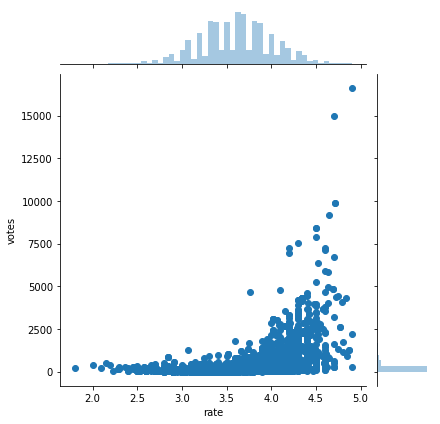

In [200]:
import seaborn as sns
sns.jointplot(x='rate', y='votes', data=dataframe)

In [201]:
dataframe['Rating-Vote-Value']= dataframe['cost_for_two']*dataframe['votes']

In [202]:
dataframe['Rating-Vote-Value']=dataframe['Rating-Vote-Value'].astype(int)
dataframe.head()

,name,online_order,rate,votes,cuisines,cost_for_two,Rating-Vote-Value
0,Jalsa,Yes,4.133333,1251.166667,"North Indian, Mughlai, Chinese",1033.333333,1292872
1,Spice Elephant,Yes,4.100000,787.000000,"Chinese, North Indian, Thai",800.000000,629600
2,San Churro Cafe,Yes,3.800000,921.000000,"Cafe, Mexican, Italian",800.000000,736800
3,Addhuri Udupi Bhojana,No,3.700000,88.000000,"South Indian, North Indian",300.000000,26400
4,Grand Village,No,3.800000,166.000000,"North Indian, Rajasthani",600.000000,99600


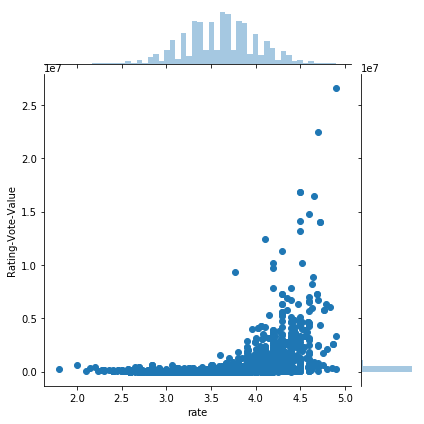

In [203]:
sns.jointplot(x='rate', y='Rating-Vote-Value', data=dataframe)

# Does Costlier Means Better?
The jointplot below tells us that the most highly rated restaurants(above 4.5 ratings) are not the costliest ones.

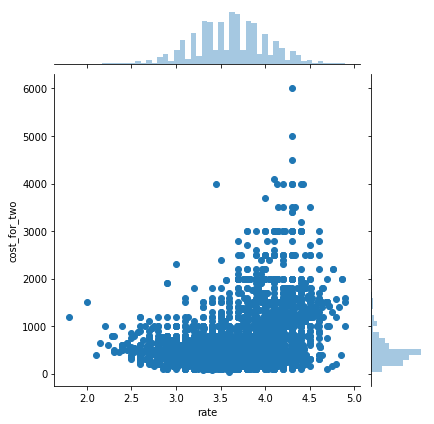

In [204]:
sns.jointplot(x='rate', y='cost_for_two', data=dataframe)

# Does cheaper means more popular?
Here is a jointplot comparision which shows the city population is really cost conscious

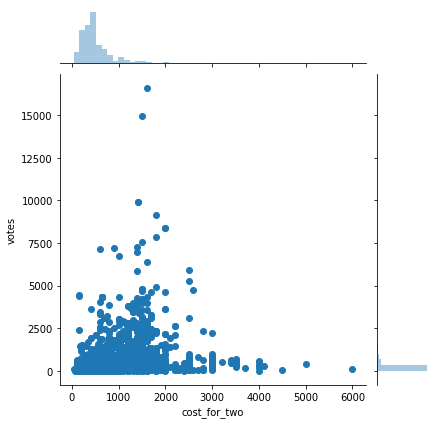

In [205]:
sns.jointplot(x='cost_for_two', y='votes', data=dataframe)

# Do the binary values online ordering tell us anything about the popularity?
Seems like... NO

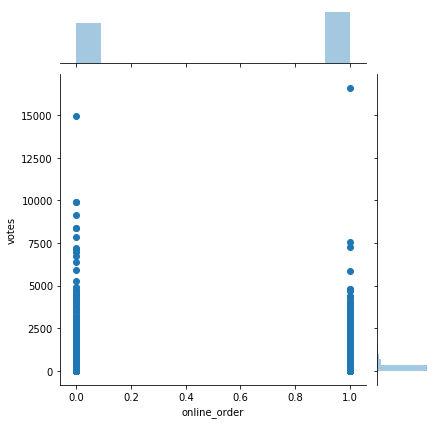

In [206]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataframe['online_order']=le.fit_transform(dataframe.online_order.values)
sns.jointplot(x='online_order', y='votes', data=dataframe)

In [207]:
dataframe["rate"].mean()

3.6158698308451194

# Quality of our recommendation system
We are not going to recommend restaurants which have below average rating (below 3.615)

In [220]:
recommendation_set = dataframe[dataframe['rate'] > 3.615] 
recommendation_set=recommendation_set.sort_values(['rate','votes','cost_for_two'], ascending=[False,False,True])
recommendation_set=recommendation_set.drop_duplicates(subset='name', keep="first")
recommendation_set.head()

,name,online_order,rate,votes,cuisines,cost_for_two,Rating-Vote-Value
2214,Byg Brewski Brewing Company,1,4.900000,16588.500000,"Continental, North Indian, Italian, South Indi...",1600.0,26541600
19331,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,0,4.900000,246.000000,"Healthy Food, Salad, Mediterranean",1000.0,246000
4767,Asia Kitchen By Mainland China,1,4.900000,2223.727273,"Asian, Chinese, Thai, Momos",1500.0,3335590
4173,Punjab Grill,1,4.866667,1286.666667,North Indian,2000.0,2573333
2939,Belgian Waffle Factory,1,4.850000,890.785714,Desserts,400.0,356314


# Top two cuisines offered by most restaurants
    Make a census of the cuisines keywords

In [221]:
c_labels = set()
for s in recommendation_set['cuisines'].str.split(',').values:
    c_labels = c_labels.union(set(s))


def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split(','):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of cuisine keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(recommendation_set, 'cuisines', c_labels)
keyword_occurences[:2]

[[' Chinese', 796], ['North Indian', 744]]

# Converting 'cuisines' into a string array

In [222]:
recommendation_set['cuisines'] = recommendation_set['cuisines'].str.split(',')
recommendation_set['cuisines'] = recommendation_set['cuisines'].fillna("").astype('str')
recommendation_set.head(2)

,name,online_order,rate,votes,cuisines,cost_for_two,Rating-Vote-Value
2214,Byg Brewski Brewing Company,1,4.9,16588.5,"['Continental', ' North Indian', ' Italian', '...",1600.0,26541600
19331,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,0,4.9,246.0,"['Healthy Food', ' Salad', ' Mediterranean']",1000.0,246000


In [223]:
recommendation_set.drop_duplicates(subset='name', keep="first")
recommendation_set['id']=pd.factorize(recommendation_set.index)[0]
recommendation_set.head()

,name,online_order,rate,votes,cuisines,cost_for_two,Rating-Vote-Value,id
2214,Byg Brewski Brewing Company,1,4.900000,16588.500000,"['Continental', ' North Indian', ' Italian', '...",1600.0,26541600,0
19331,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,0,4.900000,246.000000,"['Healthy Food', ' Salad', ' Mediterranean']",1000.0,246000,1
4767,Asia Kitchen By Mainland China,1,4.900000,2223.727273,"['Asian', ' Chinese', ' Thai', ' Momos']",1500.0,3335590,2
4173,Punjab Grill,1,4.866667,1286.666667,['North Indian'],2000.0,2573333,3
2939,Belgian Waffle Factory,1,4.850000,890.785714,['Desserts'],400.0,356314,4


In [224]:
recommendation_set.set_index("id", inplace=True)

# Tokenizing the cuisines with TF-IDF

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(recommendation_set['cuisines'])
tfidf_matrix.shape

(3241, 1005)

# K-Means clustering

In [226]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=5)
predict = kmeans.fit(tfidf_matrix)
clustered_value = kmeans.fit_predict(tfidf_matrix)
clustered_value

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [227]:
clusters_df = pd.DataFrame({'clustered_value':clustered_value, 'rest_idx':recommendation_set.index})
clusters_df.head()

,clustered_value,rest_idx
0,0,0
1,0,1
2,0,2
3,2,3
4,0,4


# Cosine Implementation
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.
# In a nutshell
In a nutshell we are finding the similarities between the restaurants. How can there be a similarity? Based on the cuisines offered by the restaurants. We find the distance between the restaurants. If the distance is less, then the restaurant is of similar type and can go for recommendation.

# Inspiration
Youtube is our inspiration behind this content based recommendation system of ours. Whenever you watch a video, videos with similar content are shown in the recommendation segment. 

# A quick note about linear_kernal
Linear Kernel is used when the data is Linearly separable, that is, it can be separated using a single Line. It is one of the most common kernels to be used. It is mostly used in Text Classification

In [228]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.02612464, 0.        , 0.25087105],
       [0.02612464, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.25087105, 0.        , 0.        , 1.        ]])

In [229]:
# Build a 1-dimensional array with cuisines
names = recommendation_set['name']
indices = pd.Series(recommendation_set.index, index=recommendation_set['name'])

def rest_recommendations(name):
    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, reverse=True)
    #sim_scores = sim_scores[1:21]
    rest_indices = [i[0] for i in sim_scores]
    return names.iloc[rest_indices]

In [230]:
recommendation_set.head(10)

,name,online_order,rate,votes,cuisines,cost_for_two,Rating-Vote-Value
id,,,,,,,
0,Byg Brewski Brewing Company,1,4.900000,16588.500000,"['Continental', ' North Indian', ' Italian', '...",1600.000000,26541600
1,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,0,4.900000,246.000000,"['Healthy Food', ' Salad', ' Mediterranean']",1000.000000,246000
2,Asia Kitchen By Mainland China,1,4.900000,2223.727273,"['Asian', ' Chinese', ' Thai', ' Momos']",1500.000000,3335590
3,Punjab Grill,1,4.866667,1286.666667,['North Indian'],2000.000000,2573333
4,Belgian Waffle Factory,1,4.850000,890.785714,['Desserts'],400.000000,356314
5,Flechazo,0,4.833333,4301.000000,"['Asian', ' Mediterranean', ' North Indian', '...",1400.000000,6021400
6,The Pizza Bakery,1,4.800000,1763.333333,"['Italian', ' Pizza', ' Beverages']",1200.000000,2116000
7,O.G. Variar & Sons,0,4.800000,1158.500000,"['Bakery', ' Desserts']",200.000000,231700
8,AB's - Absolute Barbecues,0,4.790909,4069.250000,"['European', ' Mediterranean', ' North Indian'...",1563.636364,6362827


In [231]:
rest_recommendations('O.G. Variar & Sons').head(4)

id
3240      Lassi Darbar
3239    Karachi Bakery
3238     Paratha Plaza
3237          Calvin's
Name: name, dtype: object